# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint as pp
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#local time
localtime = time.asctime( time.localtime(time.time()) )

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}
tempF = []
humidity = []
cloudy = []
windSpd = []
lat = []
lng = []
cityNums = []
cityNames = []
cityCountry = []
cityDateTime = []
cityName = ""
cityNum = ""


# Build partial query URL
for city in cities:
    query_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    response = requests.get(query_url).json()

    try:
        humidity.append(response["main"]["humidity"])
        tempF.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        cloudy.append(response["clouds"]["all"])
        windSpd.append(response["wind"]["speed"])
        cityNums.append(response["id"])
        cityNames.append(response["name"])
        cityCountry.append(response["sys"]["country"])
        cityDateTime.append(response["dt"])
        cityNum = response["id"]
        cityName = response["name"]
        
    except (KeyError):
        print("Missing field/result... skipping.")
    print(f"Processing weather data for {cityName}, city number: {cityNum}")
    

Processing weather data for Jamestown, city number: 5122534
Processing weather data for Sambava, city number: 1056899
Missing field/result... skipping.
Processing weather data for Sambava, city number: 1056899
Processing weather data for Punta Arenas, city number: 3874787
Processing weather data for Amberley, city number: 4505215
Processing weather data for Khandagayty, city number: 1503796
Processing weather data for Chui, city number: 3443061
Processing weather data for Rikitea, city number: 4030556
Processing weather data for Kualakapuas, city number: 1639304
Processing weather data for Okhotsk, city number: 2122605
Processing weather data for Cape Town, city number: 3369157
Processing weather data for Hilo, city number: 5855927
Processing weather data for Clovis, city number: 5338122
Processing weather data for Fortuna, city number: 5563839
Processing weather data for Alice Springs, city number: 2077895
Processing weather data for San Martín, city number: 3836992
Processing weather

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cityData_df = {"City ID": cityNums, "City": cityNames, "Country":cityCountry,
               "Date/Time":cityDateTime ,
               "Latitude": lat, "Longitude": lng, "Temperature (F)": tempF, 
               "Humidity (%)": humidity,
               "Cloudiness (%)": cloudy, "Wind Speed (MPH)": windSpd,
              }
cityData_df = pd.DataFrame(cityData_df)

cityData_df.head()

,City ID,City,Country,Date/Time,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,5122534,Jamestown,US,1595260173,42.10,-79.24,79.00,64,75,10.29
1,1056899,Sambava,MG,1595260010,-14.27,50.17,71.89,73,1,17.63
2,3874787,Punta Arenas,CL,1595260116,-53.15,-70.92,32.00,91,75,4.70
3,4505215,Amberley,US,1595260572,39.20,-84.43,87.01,65,1,3.36
4,1503796,Khandagayty,RU,1595260572,50.73,92.05,64.71,63,35,3.04


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
cityData_df = cityData_df.loc[cityData_df["Humidity (%)"] <= 100.0]
cityData_df.head()

,City ID,City,Country,Date/Time,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,5122534,Jamestown,US,1595260173,42.10,-79.24,79.00,64,75,10.29
1,1056899,Sambava,MG,1595260010,-14.27,50.17,71.89,73,1,17.63
2,3874787,Punta Arenas,CL,1595260116,-53.15,-70.92,32.00,91,75,4.70
3,4505215,Amberley,US,1595260572,39.20,-84.43,87.01,65,1,3.36
4,1503796,Khandagayty,RU,1595260572,50.73,92.05,64.71,63,35,3.04


In [6]:
#  Get the indices of cities that have humidity over 100%.
#REW Comment - no city has humidity (%) over 100

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [8]:
# Extract relevant fields from the data frame
cityData_df.to_csv('city_data_REW.csv', index=False)

# Export the City_Data into a csv
cityData_df.head()

,City ID,City,Country,Date/Time,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,5122534,Jamestown,US,1595260173,42.10,-79.24,79.00,64,75,10.29
1,1056899,Sambava,MG,1595260010,-14.27,50.17,71.89,73,1,17.63
2,3874787,Punta Arenas,CL,1595260116,-53.15,-70.92,32.00,91,75,4.70
3,4505215,Amberley,US,1595260572,39.20,-84.43,87.01,65,1,3.36
4,1503796,Khandagayty,RU,1595260572,50.73,92.05,64.71,63,35,3.04


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

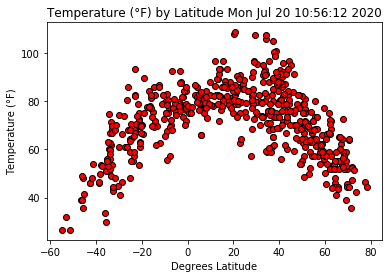

In [9]:
plt.scatter(cityData_df["Latitude"], cityData_df["Temperature (F)"],marker="o", facecolors="red", edgecolors="black")
plt.figuresize = (50,50)
plt.ylabel('Temperature (°F)')
plt.xlabel('Degrees Latitude')
plt.title(f"Temperature (°F) by Latitude {localtime}")
plt.savefig('LatVsTemp.png')

## Latitude vs. Humidity Plot

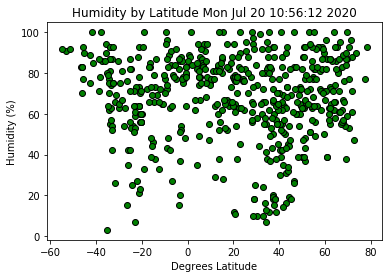

In [10]:
plt.scatter(cityData_df["Latitude"], cityData_df["Humidity (%)"],marker="o", facecolors="green", edgecolors="black")
plt.figuresize = (50,50)
plt.ylabel('Humidity (%)')
plt.xlabel('Degrees Latitude')
plt.title(f"Humidity by Latitude {localtime}")
plt.savefig('LatVsHum.png')

## Latitude vs. Cloudiness Plot

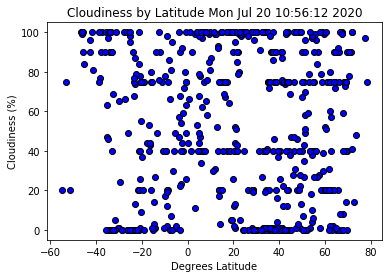

In [11]:
plt.scatter(cityData_df["Latitude"], cityData_df["Cloudiness (%)"],marker="o", facecolors="blue", edgecolors="black")
plt.figuresize = (50,50)
plt.ylabel('Cloudiness (%)')
plt.xlabel('Degrees Latitude')
plt.title(f"Cloudiness by Latitude {localtime}")
plt.savefig('LatVsCloud.png')

## Latitude vs. Wind Speed Plot

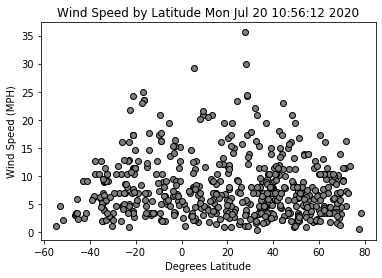

In [12]:
plt.scatter(cityData_df["Latitude"], cityData_df["Wind Speed (MPH)"],marker="o", facecolors="grey", edgecolors="black")
plt.figuresize = (50,50)
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Degrees Latitude')
plt.title(f"Wind Speed by Latitude {localtime}")
plt.savefig('LatVsWind.png')

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def reg_plot(x_values, y_values, x_title, y_title, hemisphere):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(f"{hemisphere} {x_title} vs {y_title}")
    plt.savefig(f'{hemisphere} {x_title} vs {y_title}.png')
    plt.show()
    print(line_eq)


In [14]:
# Create Northern and Southern Hemisphere DataFrames
cityDataNorth_df = cityData_df.loc[cityData_df["Latitude"] > 0]
cityDataSouth_df = cityData_df.loc[cityData_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

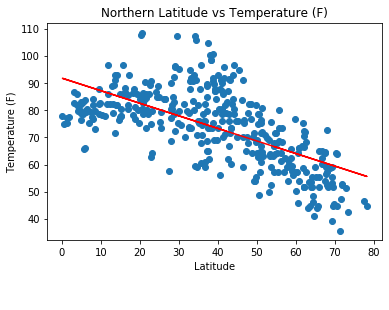

y = -0.46x + 91.92


In [15]:
reg_plot(cityDataNorth_df["Latitude"], cityDataNorth_df["Temperature (F)"], "Latitude", "Temperature (F)", "Northern")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

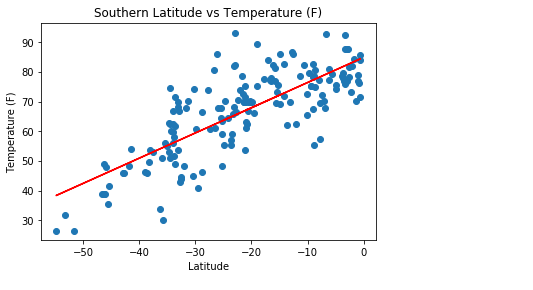

y = 0.85x + 85.0


In [16]:
reg_plot(cityDataSouth_df["Latitude"], cityDataSouth_df["Temperature (F)"], "Latitude", "Temperature (F)", "Southern")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

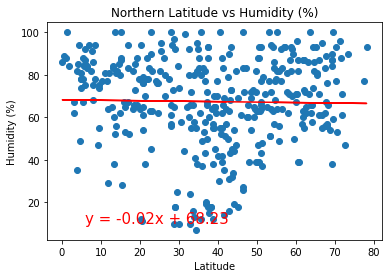

y = -0.02x + 68.23


In [17]:
reg_plot(cityDataNorth_df["Latitude"], cityDataNorth_df["Humidity (%)"], "Latitude", "Humidity (%)", "Northern")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

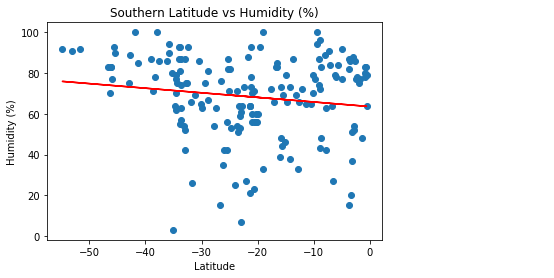

y = -0.23x + 63.52


In [18]:
reg_plot(cityDataSouth_df["Latitude"], cityDataSouth_df["Humidity (%)"], "Latitude", "Humidity (%)", "Southern")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

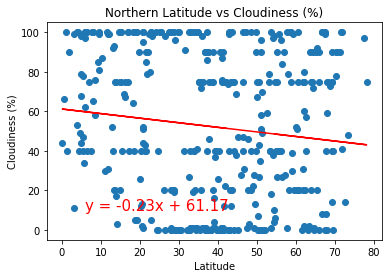

y = -0.23x + 61.17


In [19]:
reg_plot(cityDataNorth_df["Latitude"], cityDataNorth_df["Cloudiness (%)"], "Latitude", "Cloudiness (%)", "Northern")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

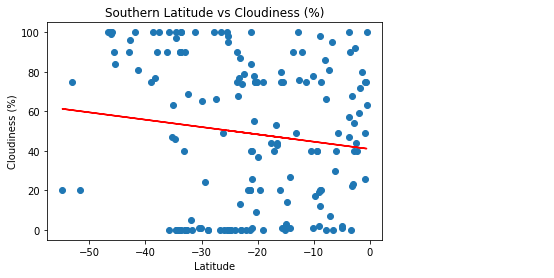

y = -0.37x + 40.91


In [20]:
reg_plot(cityDataSouth_df["Latitude"], cityDataSouth_df["Cloudiness (%)"], "Latitude", "Cloudiness (%)", "Southern")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

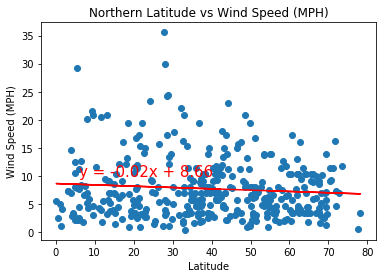

y = -0.02x + 8.66


In [21]:
reg_plot(cityDataNorth_df["Latitude"], cityDataNorth_df["Wind Speed (MPH)"], "Latitude", "Wind Speed (MPH)", "Northern")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

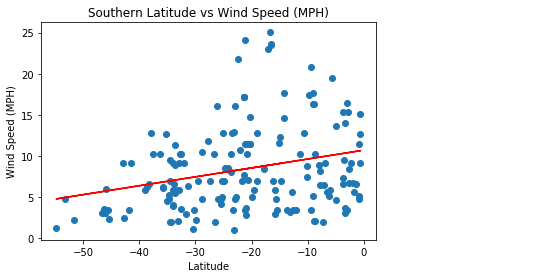

y = 0.11x + 10.7


In [22]:
reg_plot(cityDataSouth_df["Latitude"], cityDataSouth_df["Wind Speed (MPH)"], "Latitude", "Wind Speed (MPH)", "Southern")

## REW Analysis
* Temperature:  There are clear significant correlations in both both the northern and southern hemispheres where temperatures increase as the latitude approaches 0 (the equator.)  This is fairly intuitive as we know that the equator receives the most direct sunlight relative to the poles.
* Wind Speed:  For both the northern and southern hemispheres there do not seem to be significant correlations between latitude and wind speed.  However, there are some interesting clusters of increased wind speed around the +- 20 to 30 degree latitude ranges in both hemispheres which could be visible impacts of tradewinds.  
* Cloudiness:  There are weak correlations in both hemispheres relating to cloudiness, however more interesting is the 'bands' of cloudiness you can see where there are consistent cloudiness percentages across a range of latitudes making it seem as though cloud formations travel laterally across the globe in vertical bands (fronts) which seems intuitive.